<a href="https://colab.research.google.com/github/NirajBagh/Deep-Learning/blob/main/WT_based_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all Libraries#

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
%matplotlib inline
import random

#Access the Google drive in Colab #

In [2]:
## Acess google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data is in Zip format, unzip the images #

In [5]:
# Unzip Data of BCI 2003
from zipfile import ZipFile
filename='/content/drive/MyDrive/BCI Data for DL/BCI Data for DL.zip'
with ZipFile (filename,'r') as zip:
  zip.extractall()
  print('finish')


finish


# Plot five images of left hand imaginations # 

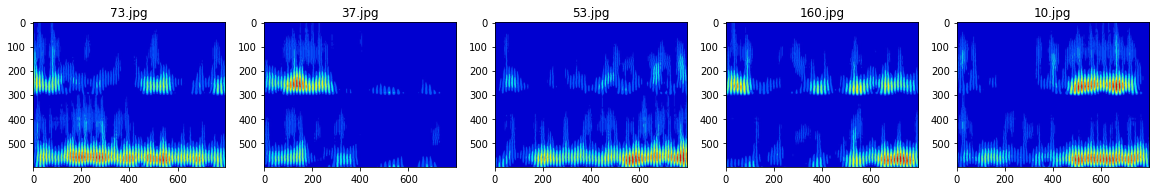

In [7]:
plt.figure(figsize=(20,20))
img_folder=r'/content/BCI Data for DL/train/Left'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

# Plot five images of right hand Imaginations # 

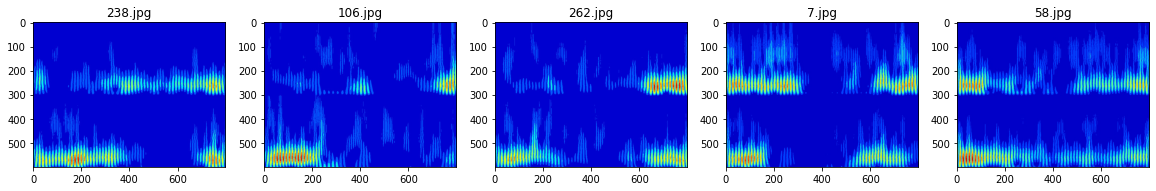

In [8]:
plt.figure(figsize=(20,20))
img_folder=r'/content/BCI Data for DL/train/Right'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [9]:
IMG_WIDTH=64
IMG_HEIGHT=64
img_folder=r'/content/BCI Data for DL/train'

In [11]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/content/BCI Data for DL/train')

#Check the class label #

In [14]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'Left': 0, 'Right': 1}

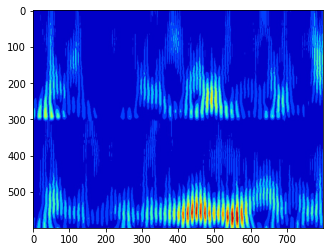

In [16]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
img_example=image.load_img('/content/BCI Data for DL/train/Left/0.jpg')
plt.imshow(img_example)

#Check the size of the image #

In [17]:
cv2.imread('/content/BCI Data for DL/train/Left/0.jpg').shape #reshape it to (64,64)

(600, 800, 3)

# Normalize the images #

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

# Change the size of image to (64,64,3) from (680,800,3)

In [19]:
training_set = train_datagen.flow_from_directory('/content/BCI Data for DL/train',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/BCI Data for DL/test',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'binary')
val_set = val_datagen.flow_from_directory('/content/BCI Data for DL/val',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [21]:
x,y=test_set.next()
x.shape, y.shape
training_set.num_classes
type(training_set)

keras.preprocessing.image.DirectoryIterator

In [22]:
training_set.class_indices

{'Left': 0, 'Right': 1}

In [23]:
training_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int32)

In [24]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [26]:
train_y.shape,test_y.shape,val_y.shape
#print(val_y)

((224,), (28,), (28,))

# Define the CNN Model #

In [30]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Initialising the CNN
CNN_Classifier=Sequential();
# Step 1 - Convolution
CNN_Classifier.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation='relu'))
# Step 2 - Pooling
CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))
# Step 1 - Convolution
CNN_Classifier.add(Conv2D(32,(3,3),activation='relu'))
# Step 2 - Pooling
CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))
# Step 3 - Flattening
CNN_Classifier.add(Flatten())
# Step 4 - Full connection
CNN_Classifier.add(Dense(units=128, activation='relu'))
CNN_Classifier.add(Dense(units=64, activation='relu'))
CNN_Classifier.add(Dense(units=1, activation='sigmoid'))
# Compiling the CNN
CNN_Classifier.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])


# CNN summary #

In [31]:
CNN_Classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [44]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
#history=CNN_Classifier.fit(training_set, validation_data=val_set, epochs = 100, verbose=1, callbacks=[es])

In [45]:
history=CNN_Classifier.fit(training_set, validation_data=val_set, epochs = 100, verbose=1)

Epoch 1/100
14/14 [==============================] - 4s 247ms/step - loss: 0.1831 - accuracy: 0.9286 - val_loss: 0.0825 - val_accuracy: 0.9643
Epoch 2/100
14/14 [==============================] - 3s 239ms/step - loss: 0.1550 - accuracy: 0.9598 - val_loss: 0.1095 - val_accuracy: 0.9643
Epoch 3/100
14/14 [==============================] - 3s 239ms/step - loss: 0.1387 - accuracy: 0.9554 - val_loss: 0.1598 - val_accuracy: 0.9643
Epoch 4/100
14/14 [==============================] - 3s 239ms/step - loss: 0.1174 - accuracy: 0.9643 - val_loss: 0.0824 - val_accuracy: 0.9643
Epoch 5/100
14/14 [==============================] - 3s 236ms/step - loss: 0.1055 - accuracy: 0.9688 - val_loss: 0.1210 - val_accuracy: 0.9643
Epoch 6/100
14/14 [==============================] - 3s 238ms/step - loss: 0.0730 - accuracy: 0.9777 - val_loss: 0.1549 - val_accuracy: 0.9286
Epoch 7/100
14/14 [==============================] - 3s 238ms/step - loss: 0.0680 - accuracy: 0.9866 - val_loss: 0.3029 - val_accuracy: 0.9286

In [46]:
val_loss,val_acc=CNN_Classifier.evaluate(val_set, verbose=2)
print('\n val accuracy:', val_acc*100)

2/2 - 0s - loss: 0.0771 - accuracy: 0.9643 - 300ms/epoch - 150ms/step

 val accuracy: 96.42857313156128


In [67]:
#history.history

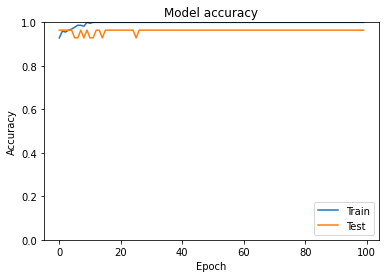

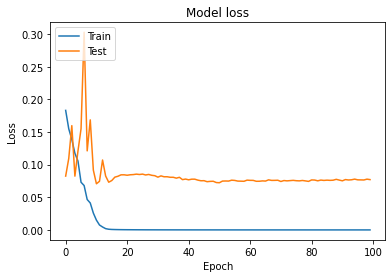

In [48]:
#  Visualization of training process
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim(0,1)

plt.figure(1)
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')



# Test models on Multiple Images ##

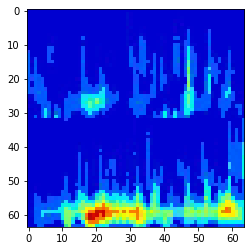

Left


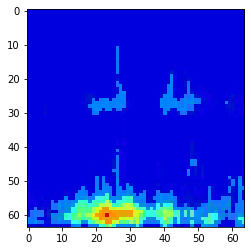

Left


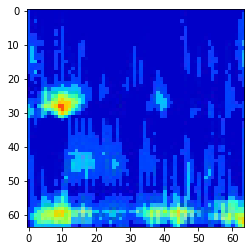

Left


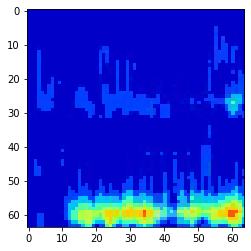

Left


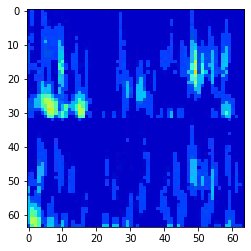

Left


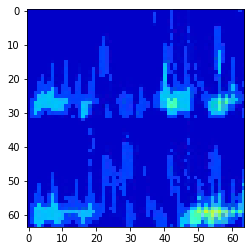

Right


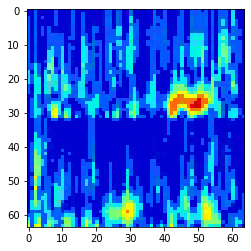

Left


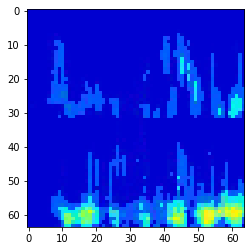

Left


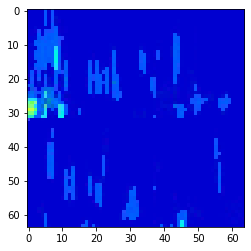

Left


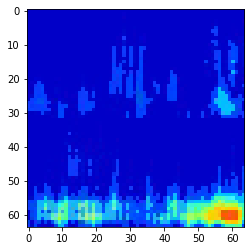

Left


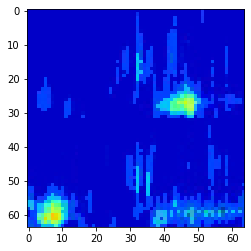

Right


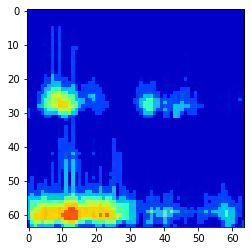

Left


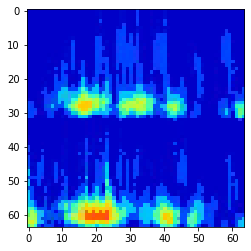

Left


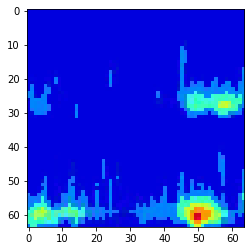

Right


In [49]:
dir_path='/content/BCI Data for DL/test/Left'
for i in os.listdir(dir_path):
  #print(i)
  img=image.load_img(dir_path+'//'+i,target_size=(64,64))
  plt.imshow(img)
  plt.show()
  test_image_new=image.img_to_array(img)
  test_image_new_new=np.expand_dims(test_image_new, axis=0)
  images=np.vstack([test_image_new_new])
  result=CNN_Classifier.predict(images)
  if result==0:
    prediction='Left'
    print(prediction)
  else:
     prediction='Right'
     print(prediction)

# Test Model on unseen images #

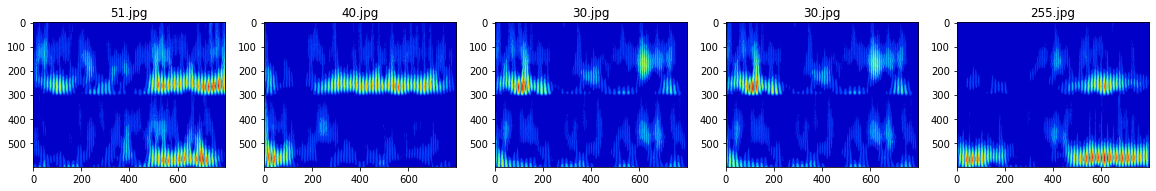

In [64]:
plt.figure(figsize=(20,20))
img_folder=r'/content/drive/MyDrive/BCI Data for DL/Unseen Data'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

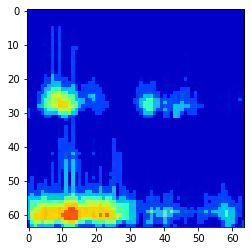

Left


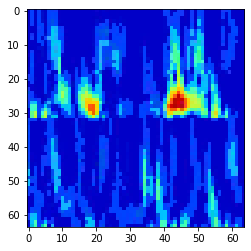

Right


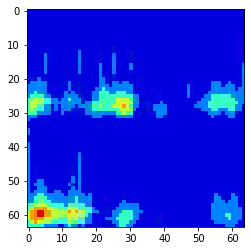

Right


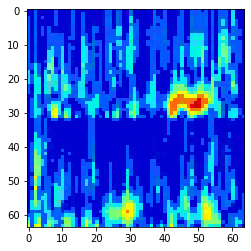

Left


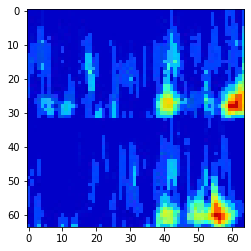

Right


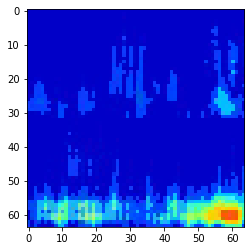

Left


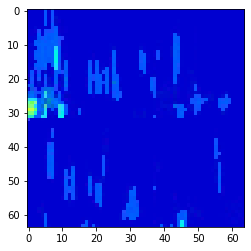

Left


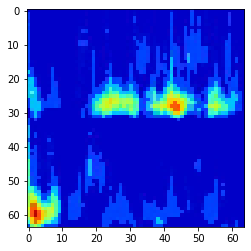

Right


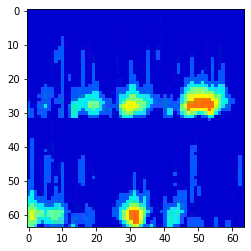

Right


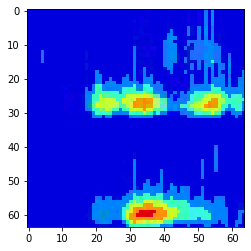

Right


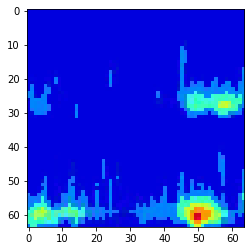

Right


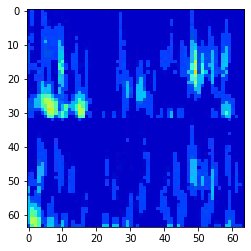

Left


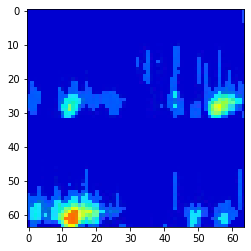

Right


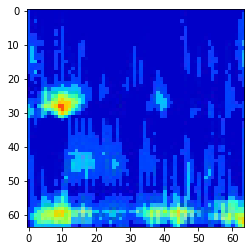

Left


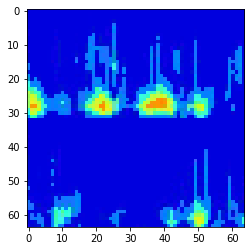

Right


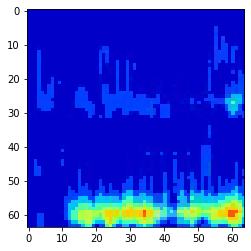

Left


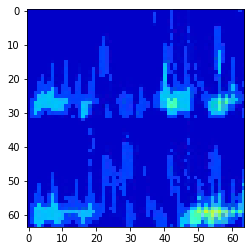

Right


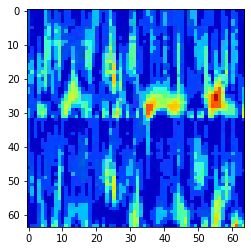

Right


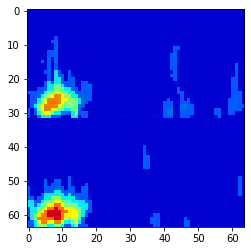

Left


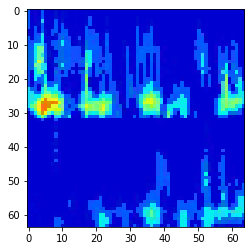

Right


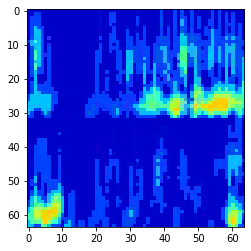

Right


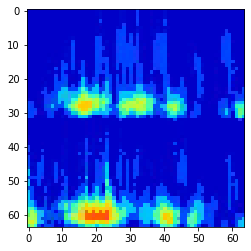

Left


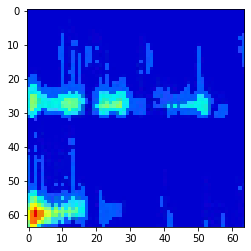

Right


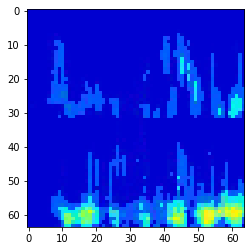

Left


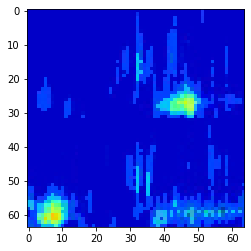

Right


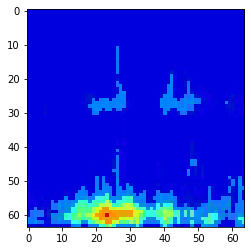

Left


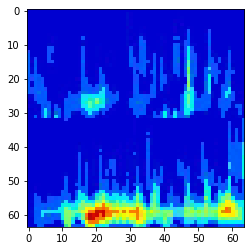

Left


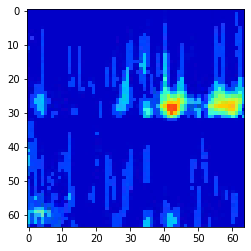

Right


In [65]:
dir_path='/content/drive/MyDrive/BCI Data for DL/Unseen Data'
for i in os.listdir(dir_path):
  #print(i)
  img=image.load_img(dir_path+'//'+i,target_size=(64,64))
  plt.imshow(img)
  plt.show()
  test_image_new=image.img_to_array(img)
  test_image_new_new=np.expand_dims(test_image_new, axis=0)
  images=np.vstack([test_image_new_new])
  result=CNN_Classifier.predict(images)
  if result==0:
    prediction='Left'
    print(prediction)
  else:
     prediction='Right'
     print(prediction)